<a href="https://colab.research.google.com/github/RogMaverick18/Speech-Processing-Lab-assignments/blob/main/Lab%201%20-%20objective%202.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

OBJECTIVE 1: USER VOICE ANALYSIS
[NOTE] User voice file not found at 'your_recorded_voice.wav'.
Please upload your .wav file to run Objective 1.

OBJECTIVE 2: LJ SPEECH DATASET ANALYSIS

--- Task 2: Dataset Statistics & Basic Info ---
Processing 13100 files to calculate total duration...


Scanning Files:   0%|          | 0/13100 [00:00<?, ?it/s]


[Dataset Information]
Total Number of Samples (Files) : 13100
Total Dataset Duration          : 23.92 hours (86117.08 seconds)

[Single File Analysis: LJ004-0143.wav]
Sample Rate            : 22050 Hz
No. of Signal Samples  : 69533
File Duration          : 3.15 sec
Active Speech Duration : 2.76 sec


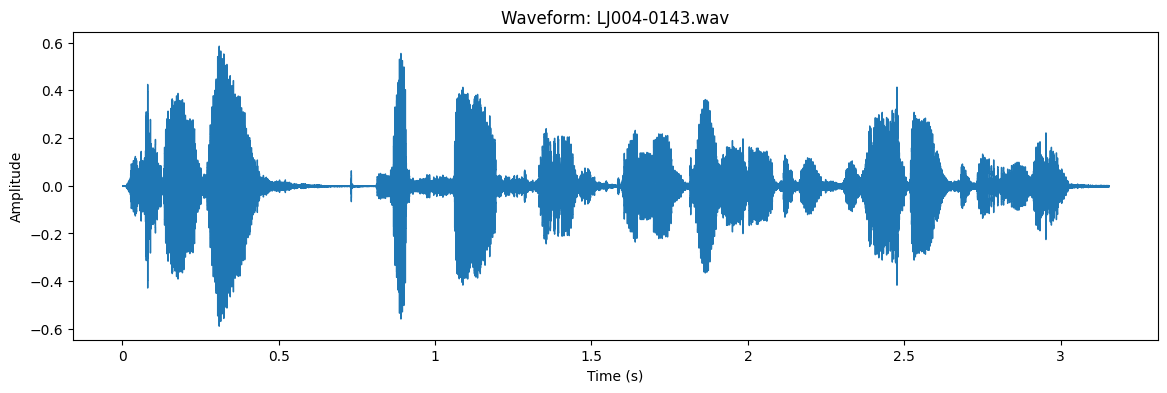


--- Task 3: Signal Operations ---
Performing 3(i): Slicing & Normalization...


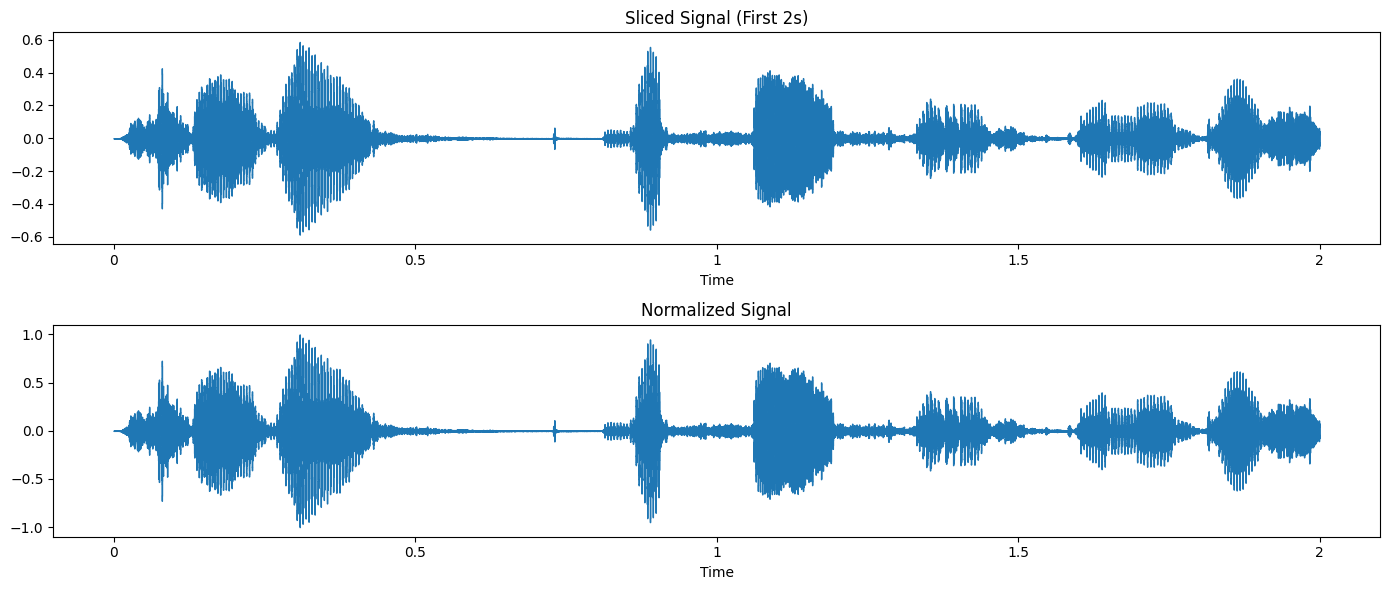

Performing 3(ii): Amp, De-amp, Up-sample, Down-sample...


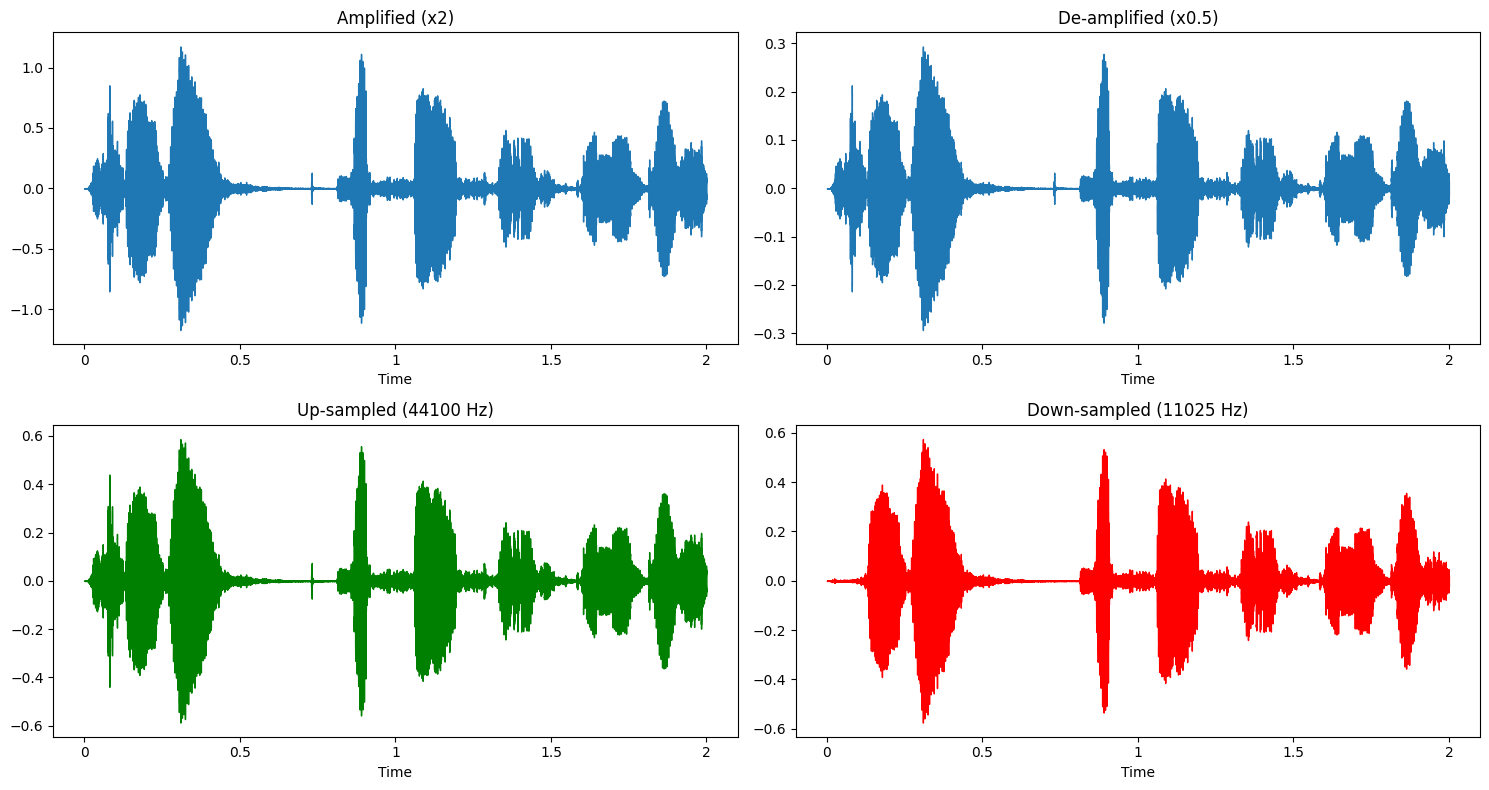

Performing 3(iii): Voiced/Unvoiced Identification...


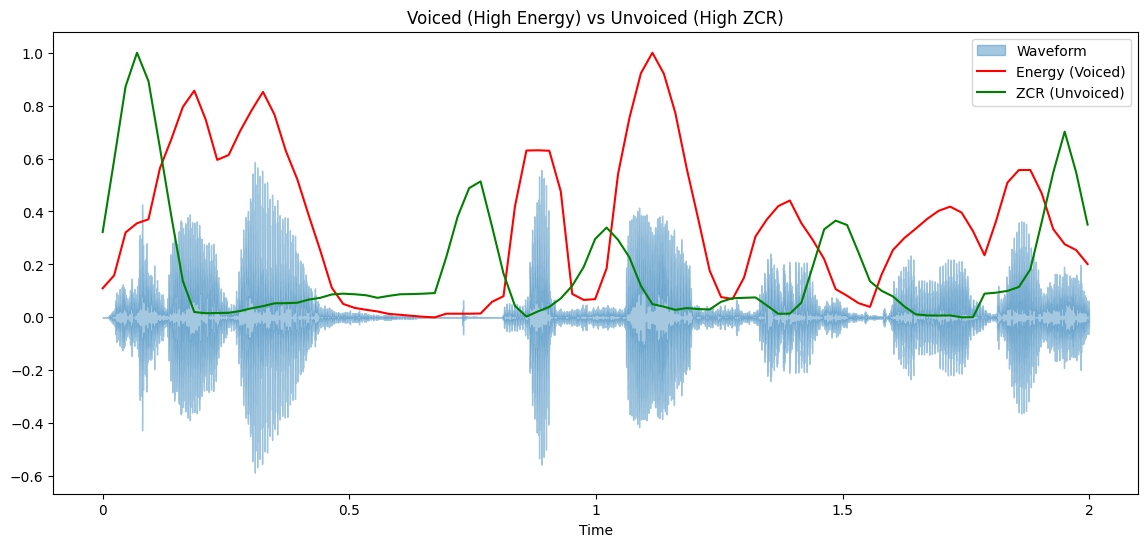

In [ ]:
!pip install soundfile simpleaudio librosa scipy tqdm

import numpy as np
import matplotlib.pyplot as plt
import soundfile as sf
import simpleaudio as sa
import librosa
import librosa.display
import os
import glob
from tqdm.notebook import tqdm

print("="*40)
print("OBJECTIVE 1: USER VOICE ANALYSIS")
print("="*40)

USER_VOICE_PATH = "your_recorded_voice.wav"

if os.path.exists(USER_VOICE_PATH):
    file_info = sf.info(USER_VOICE_PATH)

    print(f"File: {USER_VOICE_PATH}")
    print(f"Sampling Rate : {file_info.samplerate} Hz")
    print(f"Bit Depth     : {file_info.subtype}")
    print(f"Duration      : {file_info.duration:.2f} seconds")
else:
    print(f"[NOTE] User voice file not found at '{USER_VOICE_PATH}'.")
    print("Please upload your .wav file to run Objective 1.")


print("\n" + "="*40)
print("OBJECTIVE 2: LJ SPEECH DATASET ANALYSIS")
print("="*40)

DATASET_DIR = "/kaggle/input/the-lj-speech-dataset/LJSpeech-1.1/wavs"
wav_files = glob.glob(os.path.join(DATASET_DIR, "*.wav"))

if len(wav_files) > 0:

    print("\n--- Task 2: Dataset Statistics & Basic Info ---")

    total_duration_sec = 0
    print(f"Processing {len(wav_files)} files to calculate total duration...")

    for w_file in tqdm(wav_files, desc="Scanning Files"):
        try:
            info = sf.info(w_file)
            total_duration_sec += info.duration
        except:
            continue

    total_duration_hrs = total_duration_sec / 3600

    print(f"\n[Dataset Information]")
    print(f"Total Number of Samples (Files) : {len(wav_files)}")
    print(f"Total Dataset Duration          : {total_duration_hrs:.2f} hours ({total_duration_sec:.2f} seconds)")

    file_path = wav_files[0]
    y, sr = librosa.load(file_path, sr=None)

    rms = librosa.feature.rms(y=y)[0]
    silence_thresh = 0.01
    active_duration = (np.sum(rms > silence_thresh) * 512) / sr

    print(f"\n[Single File Analysis: {os.path.basename(file_path)}]")
    print(f"Sample Rate            : {sr} Hz")
    print(f"No. of Signal Samples  : {len(y)}")
    print(f"File Duration          : {len(y)/sr:.2f} sec")
    print(f"Active Speech Duration : {active_duration:.2f} sec")

    plt.figure(figsize=(14, 4))
    librosa.display.waveshow(y, sr=sr)
    plt.title(f'Waveform: {os.path.basename(file_path)}')
    plt.xlabel('Time (s)')
    plt.ylabel('Amplitude')
    plt.show()

    print("\n--- Task 3: Signal Operations ---")

    print("Performing 3(i): Slicing & Normalization...")
    y_slice = y[:2 * sr]
    y_norm = librosa.util.normalize(y_slice)

    plt.figure(figsize=(14, 6))
    plt.subplot(2, 1, 1)
    librosa.display.waveshow(y_slice, sr=sr)
    plt.title('Sliced Signal (First 2s)')
    plt.subplot(2, 1, 2)
    librosa.display.waveshow(y_norm, sr=sr)
    plt.title('Normalized Signal')
    plt.tight_layout()
    plt.show()

    print("Performing 3(ii): Amp, De-amp, Up-sample, Down-sample...")

    y_amp = y_slice * 2.0
    y_deamp = y_slice * 0.5
    y_up = librosa.resample(y_slice, orig_sr=sr, target_sr=sr*2)
    y_down = librosa.resample(y_slice, orig_sr=sr, target_sr=sr//2)

    fig, ax = plt.subplots(2, 2, figsize=(15, 8))

    librosa.display.waveshow(y_amp, sr=sr, ax=ax[0, 0])
    ax[0, 0].set_title('Amplified (x2)')

    librosa.display.waveshow(y_deamp, sr=sr, ax=ax[0, 1])
    ax[0, 1].set_title('De-amplified (x0.5)')

    librosa.display.waveshow(y_up, sr=sr*2, ax=ax[1, 0], color='g')
    ax[1, 0].set_title(f'Up-sampled ({sr*2} Hz)')

    librosa.display.waveshow(y_down, sr=sr//2, ax=ax[1, 1], color='r')
    ax[1, 1].set_title(f'Down-sampled ({sr//2} Hz)')

    plt.tight_layout()
    plt.show()

    print("Performing 3(iii): Voiced/Unvoiced Identification...")

    zcr = librosa.feature.zero_crossing_rate(y_slice)[0]
    energy = librosa.feature.rms(y=y_slice)[0]

    def norm_feat(x): return (x - x.min()) / (x.max() - x.min())

    times = librosa.times_like(zcr, sr=sr)

    plt.figure(figsize=(14, 6))
    librosa.display.waveshow(y_slice, sr=sr, alpha=0.4, label='Waveform')
    plt.plot(times, norm_feat(energy), 'r', label='Energy (Voiced)')
    plt.plot(times, norm_feat(zcr), 'g', label='ZCR (Unvoiced)')
    plt.legend()
    plt.title('Voiced (High Energy) vs Unvoiced (High ZCR)')
    plt.show()

else:
    print("Error: No .wav files found in the specified path.")